## Задание №2
### Подготовка

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import mnist

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
X_train = mnist.train_images()
y_train = mnist.train_labels()

dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)

### Ну что, народ, погнали

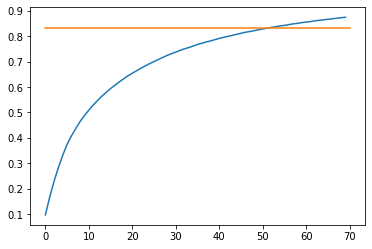

In [3]:
ev_ = 0.83 # доля объясненной дисперсии должна превышать это значение
M = 0
pca = PCA(n_components=70, svd_solver='full')
pca.fit(X_train)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
for i, ev in enumerate(explained_variance):
    if ev > ev_:
        M = i + 1
        break

plt.plot(np.arange(70), explained_variance)
plt.plot([0, 70], [0.83, 0.83]);

In [4]:
print(f' Необходимо {M} компонент(ы)')

Необходимо 52 компонент(ы)


In [5]:
pca = PCA(n_components=M, svd_solver='full')
pca.fit(X_train)
X_test_transformed = pca.transform(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_test_transformed, y_train, test_size=0.3, random_state=126)
print('Выборочное среднее нулевой колонки для полученного тренировочного набора')
print(sum([i[0] for i in X_train]) / len(X_train))

Выборочное среднее нулевой колонки для полученного тренировочного набора
0.5965431171660364


In [6]:
rfc = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=126)
clf = OneVsRestClassifier(rfc).fit(X_train, y_train)

y_pred = clf.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
P = 5
print(f'Число верно определенных классов {P}: {CM[P][P]}')

Число верно определенных классов 5: 1414


In [7]:
data = pd.read_csv('pred_for_task.csv', index_col='FileName')
X_test = data.drop('Label', axis=1)
X_test = pca.transform(X_test)
y_test = data['Label']
y_pred = clf.predict(X_test)
proba = clf.predict_proba([X_test[19]])[0][4]
print(f'вероятность: {proba}')

вероятность: 0.9632103360054342
